In [ ]:
#TSA Data that I found. Could be useful, shows sharp decline in how many passengers go through TSA checkpoints

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("Resources/tsadata.csv")
data.head()

,DATE,2019,2020,2021
0,1/1,"2,126,398","2,311,732","805,990"
1,1/2,"2,345,103","2,178,656","1,192,881"
2,1/3,"2,202,111","2,422,272","1,327,289"
3,1/4,"2,150,571","2,210,542","1,080,346"
4,1/5,"1,975,947","1,806,480","766,594"


In [4]:
d2019 = data.loc[:, ['DATE','2019']]
d2020 = data.loc[:, ['DATE','2020']]
d2020.head()
d2020.dtypes

DATE    object
2020    object
dtype: object

In [5]:
d2019[['MONTH', 'DAY']] = d2019['DATE'].str.split('/', 1, expand=True)
# d2019['DAY'] =d2019['DATE'].str.split('/')[1]
d2019['YEAR'] = 2019
d2019['DATE'] = pd.to_datetime(d2019[['YEAR', 'MONTH', 'DAY']])
d2019 = d2019.drop(columns=['YEAR', 'MONTH', 'DAY'])
d2019['2019'] = d2019['2019'].astype(str)
d2019 = d2019.replace(',', '', regex=True)
d2019['2019'] = d2019['2019'].astype(int)
d2019 = d2019.rename(columns={"2019":'Passenger Number'})
d2019.head()

,DATE,Passenger Number
0,2019-01-01,2126398
1,2019-01-02,2345103
2,2019-01-03,2202111
3,2019-01-04,2150571
4,2019-01-05,1975947


In [6]:
d2020[['MONTH', 'DAY']] = d2020['DATE'].str.split('/', 1, expand=True)
# d2019['DAY'] =d2019['DATE'].str.split('/')[1]
d2020['YEAR'] = 2020
d2020['DATE'] = pd.to_datetime(d2020[['YEAR', 'MONTH', 'DAY']])
d2020 = d2020.drop(columns=['YEAR', 'MONTH', 'DAY'])
d2020['2020'] = d2020['2020'].astype(str)
d2020 = d2020.replace(',', '', regex=True)
d2020['2020'] = d2020['2020'].astype(int)
d2020 = d2020.rename(columns={"2020":'Passenger Number'})
d2020.head()

,DATE,Passenger Number
0,2020-01-01,2311732
1,2020-01-02,2178656
2,2020-01-03,2422272
3,2020-01-04,2210542
4,2020-01-05,1806480


In [7]:
dfs = [d2019, d2020]
final = pd.concat(dfs).reset_index(drop=True)
final.head()

,DATE,Passenger Number
0,2019-01-01,2126398
1,2019-01-02,2345103
2,2019-01-03,2202111
3,2019-01-04,2150571
4,2019-01-05,1975947


In [8]:
final_plot = final.groupby(final['DATE'].dt.to_period('M')).sum()
final_plot = final_plot.resample('M').asfreq().fillna(0)
final_plot.head()

,Passenger Number
DATE,
2019-01,59405722
2019-02,57345684
2019-03,72680065
2019-04,70124591
2019-05,74499253


In [9]:
final_plot

,Passenger Number
DATE,
2019-01,59405722
2019-02,57345684
2019-03,72680065
2019-04,70124591
2019-05,74499253
2019-06,76619900
2019-07,79511968
2019-08,74776010
2019-09,66531258


<AxesSubplot:title={'center':'TSA Passenger Throughput in Millions'}, xlabel='DATE'>

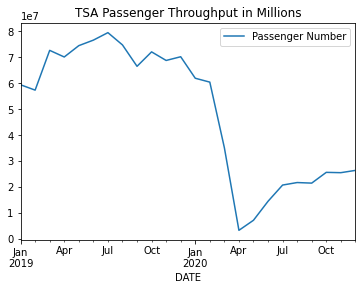

In [12]:
final_plot.plot(kind='line', title = "TSA Passenger Throughput in Millions")


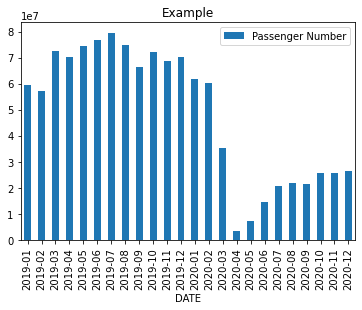

In [11]:
final_plot_bar = final_plot.plot(kind='bar', title = "Example")

TypeError: 'Text' object is not callable